In [1]:
%matplotlib inline 
# 주피터에서만 사용
import matplotlib.pyplot as plt # 시각화
import mglearn # 학습도움
# 랜덤 사이즈를 채운후 행렬제곱을 하면 => 정방, 대칭행렬
# 고유값분해 = 고유치, 고유벡터
# MDS 행렬곱 ( 직교하는 2,3차원 ) : 2차원이나 3차원 특징추출
# forward propagation 순전파 : 예측분류과정( 가중치가 random하기 초기화 )
# backward propagation 역전파 : 가중치 학습과정( cost function 기울기, learing rate )
# MLP : multi layer preceptron : FFNN(Feed forward neural network)
from sklearn.neural_network import MLPClassifier # MLPRegressor
# solver : 미분, learng-rate 조절 => 가중치를 조절
# estimator, transformer
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, '특성 1')

C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


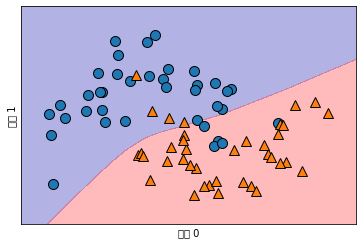

In [2]:
# stratify 층화 변수 선택법
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
# Multi layer => XOR문제를 해결, 레이어가 많으면 정밀도 자동으로 높아짐.
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
# 가중치가 완성 - 레이어 지정 자동으로 MLPClassifier가 가중치레이어 사이즈 결정
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [3]:
mlp.get_params() # 디폴트 매개변수
# relu 0 이하를 제거한 활성화 함수 (activation function)
# 속도가 빨라짐
# epoch 1회 반복
# adam : learning - rate 를 조절, Momentum을 사용하는 optimizer( 최적화 )

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [4]:
mlp.n_layers_

3

In [5]:
mlp.coefs_ # coefficient
# bias : 계수들이 0으로 가는 것을 방지해서 처음에 1로 세팅

[array([[ 1.96423650e-01,  1.86414048e-01,  2.73074871e-02,
          1.32154297e-01, -9.48047217e-05,  2.82807555e-03,
         -7.29479240e-02,  1.45878653e-01,  2.97837159e-01,
         -1.12611776e-01,  2.34714552e-01,  1.30702586e-01,
         -2.85623212e-02,  1.12399918e-01, -1.71442282e-01,
         -3.24829063e-01, -3.85153290e-01,  2.38832765e-01,
          2.13193712e-01,  2.63746115e-01,  1.70653255e-01,
          7.41106685e-02,  1.04573476e-01,  6.73150355e-02,
         -3.77696555e-01,  1.10071889e-01,  4.88102808e-03,
          3.03409150e-01, -6.64267214e-02, -1.08723630e-01,
         -2.67443736e-01,  2.19702964e-01, -9.77933350e-02,
          3.95350833e-05, -1.67873856e-01,  1.32818304e-01,
          2.23922646e-02, -1.13671191e-02,  2.94106612e-01,
          3.48486041e-02, -1.28573692e-01, -1.62111791e-05,
          1.34093216e-01, -3.48957410e-01,  1.73951614e-01,
          2.50280090e-02, -3.77490782e-01, -3.22208104e-01,
         -8.09493846e-02, -4.14861544e-0

In [6]:
mlp.classes_

array([0, 1], dtype=int64)

In [7]:
mlp.n_outputs_

1

Text(0, 0.5, '특성 1')

C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


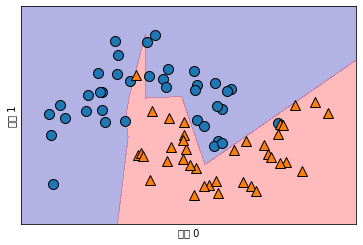

In [8]:
# 레이어가 10개 이상주면 기울기 조절 문제
# 멀티레이어 : XOR문제 해결, 정확도가 높아지는 것을 발견
mlp = MLPClassifier(solver='lbfgs',  # 과적합
                    # 레이어가 2개 출력차수
                    random_state=0,hidden_layer_sizes=[10]) # 10,10에서
# mlp = MLPClassifier(solver='lbfgs',
#                     random_state=0,hidden_layer_sizes=[5,10])
                      # 레이어가 2개
# SVM의 논리 : 고차원으로 데이터 확대 ( 고차원을 선호하는 모델 )
# -정확도가 높아 고적합을 방지
#  SVC(Classifier), SVR(Regression)
# 히든 레이어 사이즈 지정시 무엇을 지정하는가
# 출력차수만 지정해주면 됨 ( 추출힐 특징수 )
# 2x10, 10x10
mlp.fit(X_train, y_train) 
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [9]:
# BLACK BOX -> 아직 원인규명X
mlp.coefs_
# x,y,좌표로
# 2x10 bias가 10
# 2x10, 10x10 # 10으로 나감

# 5,10
# 레이어 사이즈를 지정 출력차수만 지정 ( 5,10 ) : 입력데이터
# 2x5, 5x10

[array([[ -4.9818262 ,  22.94559802,  11.2952523 ,  42.91350414,
          -0.10638399,  12.450265  ,  -0.08696973,  18.40556868,
           5.91473827,  -0.09957052],
        [  2.76470468, -10.24958482,   2.03364121,  -6.10960884,
          -0.59774414,  -0.57889683,  -0.66855653,  -2.51508397,
         -16.13762386,  -1.56805821]]), array([[ -7.44132317],
        [ 14.92540772],
        [ -9.50395538],
        [-16.8715502 ],
        [ -0.70036373],
        [  4.49798076],
        [  0.16314654],
        [ 24.89345945],
        [ -8.48263277],
        [ -2.66394106]])]

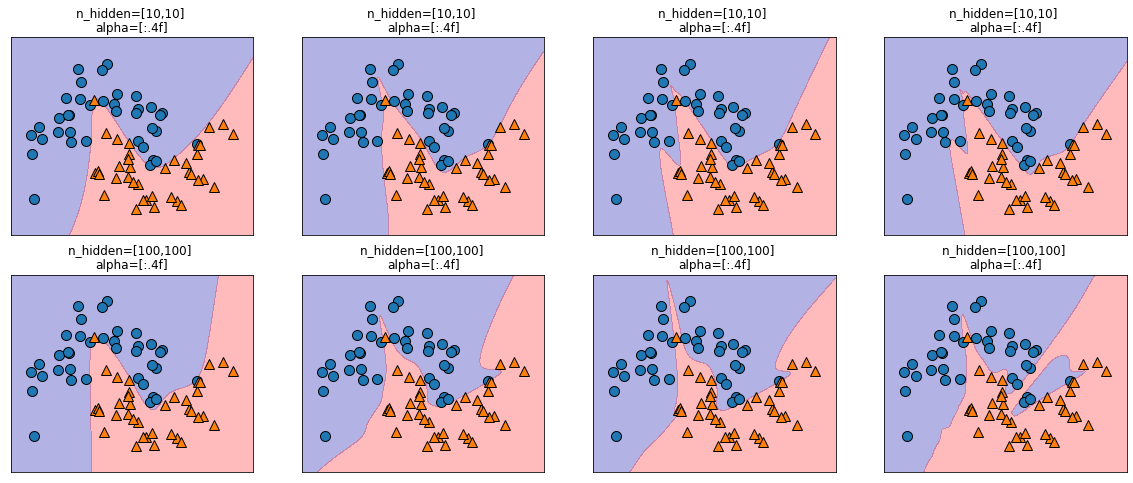

In [10]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.1, 0.001, 0.0001, 0.00001]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,activation='tanh',
                           hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        # alpha 규제값(과적합 해결)- 작을수록 과적합됨
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}] \nalpha=[:.4f]".format(n_hidden_nodes, n_hidden_nodes,alpha))

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최대값: \n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

mlp = MLPClassifier(random_state = 42) # 디폴트
mlp.fit(X_train, y_train) # 가중치 결정
print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train, y_train))) # 94 # parameter tuning
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test, y_test))) # 92
mlp

훈련 세트 정확도 : 0.94
테스트 세트 정확도 : 0.92


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
mean_on_train = X_train.mean(axis=0) # 평균
std_on_train = X_train.std(axis=0) # 표준편차

# Z점수 표준화
X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train))) # 100%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 97%
# 차이가 3%이긴 하지만 비슷하지 않으면 좋은 값은 아니다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [15]:
# 일반화 되었다.
mlp = MLPClassifier(max_iter=1000, alpha=1,random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train))) # 98%
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test))) # 97%

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [16]:
mlp.coefs_

[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]]),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ],
        [-0.26194311],

C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45787 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 4576

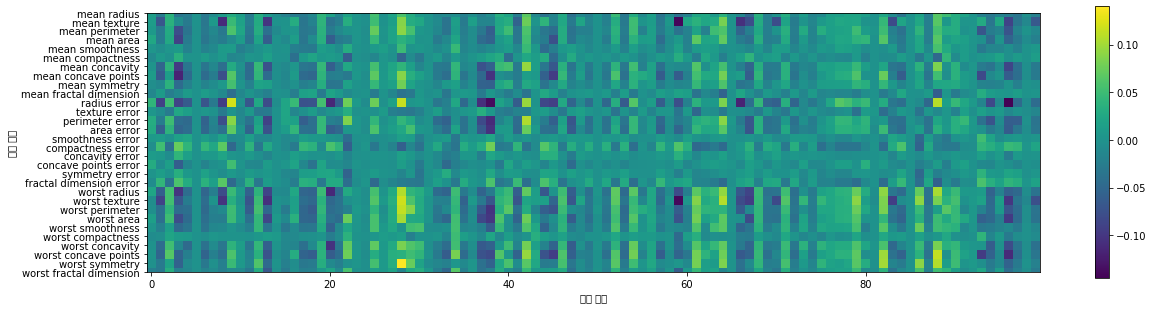

In [17]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

In [33]:
import pandas as pd

wine = pd.read_csv('./wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8") 
wine.shape # 관측치 178, 변수 14 # 분류 : 독립변수와 종속변수

(178, 14)

In [34]:
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [36]:
print(y.unique())

[1 2 3]


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# StandardScaler(copy = True, with_mean = True, with_std = True) # copy = True : 원본은 그대로
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.neural_network import MLPClassifier
# 디폴트 hidden_layer_sizes (100,)
mlp = MLPClassifier(hidden_layer_sizes=(30, 30, 30))
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [39]:
from sklearn.metrics import classification_report
# pricision 정밀도 = TP/(TP+FP)-에측중심 recall 재현율 = TP/(TP+TN)-실제값 중심
# f1_score = () 2*(pricision*recall)/(precision+recall)
from sklearn.metrics import confusion_matrix
predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
# 1,2,3의 의미 = unique

[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



(13, 30)
(30, 30)
(30, 30)


Text(0, 0.5, '입력 특성')

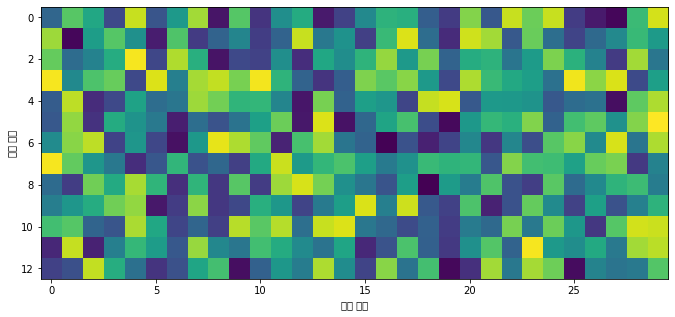

In [41]:
print(mlp.coefs_[0].shape)
print(mlp.coefs_[1].shape)
print(mlp.coefs_[2].shape)
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none', cmap='viridis')
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
# plt.colorbar()

In [ ]:
#######################################################################################################

In [56]:
X_train, X_test, y_train, y_test = train_test_split(wine.iloc[:,2:],wine.Cultivator, random_state = 0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.2f}".format(mlp.score(X_train, y_train))) # 94 # parameter tuning
print("테스트 세트 정확도 : {:.2f}".format(mlp.score(X_test, y_test))) 

훈련 세트 정확도 : 0.92
테스트 세트 정확도 : 0.93


C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
mean_on_train = X_train.mean(axis=0) # 평균
std_on_train = X_train.std(axis=0) # 표준편차

# Z점수 표준화
X_train_scaled = (X_train - mean_on_train)/std_on_train
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.978


C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [58]:
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
# 차이가 3%이긴 하지만 비슷하지 않으면 좋은 값은 아니다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.978


In [59]:
# 일반화 되었다.
mlp = MLPClassifier(max_iter=1000, alpha=1,random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.956


In [ ]:
###############################################################################

In [ ]:
# NNF ( Non-negative matrix factorization) : 비음수 행렬 분해
- PCA는 음수와 양수의 차이를 상계해서 처리
- 양수인 데이터에 적용 : 음성데이터, signal

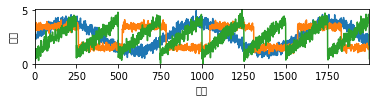

In [44]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("시간")
plt.ylabel("산호")
plt.margins(0)

In [49]:
import numpy as np
# 노이즈 : 전송데이터ㅈ
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("측정 데이터 형태: {}".format(X.shape))

측정 데이터 형태: (2000, 100)


In [50]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("복원한 신호 데이터 형태: {}".format(S_.shape))

복원한 신호 데이터 형태: (2000, 3)


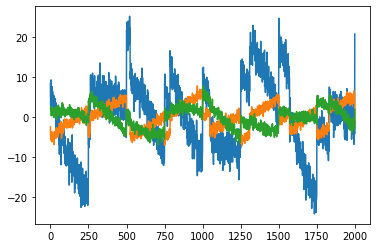

In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)
plt.plot(H)

In [54]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

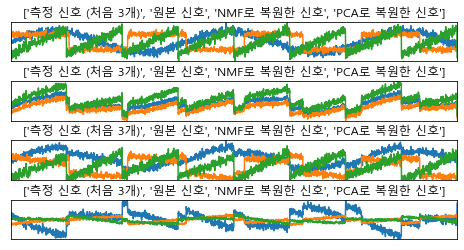

In [56]:
# 원본,노이즈, NMF,PCA
models = [S, X, S_, H] # 노이즈: 양수 데이터는 노이즈를 제거못함
names = ['측정 신호 (처음 3개)','원본 신호','NMF로 복원한 신호','PCA로 복원한 신호']
fig, axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(),'yticks':()})
for model, names, ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')
    ax.margins(0)